# import packages and functions

In [18]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import xmitgcm
import gsw
from xmitgcm import llcreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
import warnings
warnings.filterwarnings('ignore')

# try to combine the numbers before we plot

In [20]:

# Load the lon, lat, and data arrays from .npy files
lon_arrays = [np.load(f'lon_array_{i}.npy') for i in range(4)]
lat_arrays = [np.load(f'lat_array_{i}.npy') for i in range(4)]
data_arrays = [np.load(f'data_array_{i}.npy') for i in range(4)]



# Now you can use these arrays for plotting or further processing

In [21]:
# # set a land mask
# # Create a new array with the same shape as data_arrays but with the described conditions
# new_arrays = []

# for data_array in data_arrays:
#     # Create a new array where:
#     # - 1 where data_array is NaN
#     # - NaN where data_array is a number
#     new_array = np.where(np.isnan(data_array), 1, np.nan)
    
#     # Append the result to new_arrays
#     new_arrays.append(new_array)

(-3000000.0, 3000000.0)
(-3000000.0, 3000000.0)


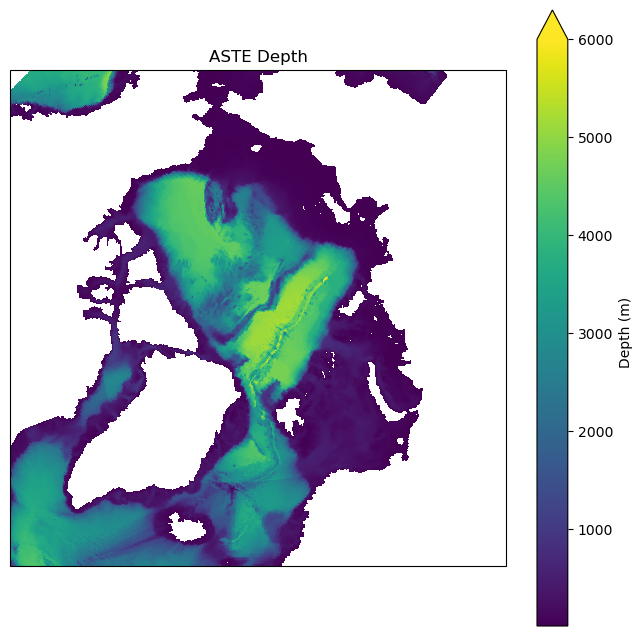

In [24]:
# Create the plot
subplot_kw = {"projection": ccrs.Orthographic(central_longitude=0, central_latitude=90)}
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=subplot_kw, figsize=(8, 8))

# Set the extent if needed (uncomment if you want to zoom in on 
#ax.set_extent([-180, 180, 70, 90], crs=ccrs.PlateCarree())

for i in range(4):
    lon = lon_arrays[i]
    lat = lat_arrays[i]
    data = data_arrays[i]
    hfacC = new_arrays[i]
    
    # Handle NaNs in lon, lat, and data
    lon[np.isnan(lon)] = np.nanmin(lon) - 1  # fill with near values to avoid errors
    lat[np.isnan(lat)] = np.nanmin(lat) - 1
    data[np.isnan(lon)] = np.nan
    data[np.isnan(lat)] = np.nan
    #data[np.isnan(data)] = 0

    # C = ax.pcolormesh(
    #     lon,
    #     lat,
    #     hfacC,  # First time step, 0 depth, tile
    #     transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
    #     cmap='viridis',
    # )

    # Create the plot using pcolormesh
    C = ax.pcolormesh(
        lon,
        lat,
        data,  # First time step, 0 depth, tile
        transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
        cmap='viridis',
    )


    
    ax.set_global()
    #ax.set_extent([-180, 180, 70, 90], crs=ccrs.PlateCarree())

    ax.set_title("ASTE Depth")

# Add a colorbar
fig.colorbar(C, ax=ax, orientation='vertical', label="Depth (m)",extend="max")

ax.set_xlim(-3e6,3e6)
ax.set_ylim(-3e6,3e6)


# Optional: Uncomment to add coastlines or land features
# ax.coastlines()
# ax.add_feature(cfeature.LAND.with_scale('110m'), zorder=2, facecolor="white")

# Save the plot if needed
# plt.savefig('output_plot2.png', dpi=300)
print(ax.get_xlim())
print(ax.get_ylim())


# plt.show()

plt.savefig("test.png",dpi=300)